## The Problem Statement. 

The aim of the project is to learn how to optimise machine learning hyperparameters using the following three strategies:
- Grid Search
- Randomized Search
- Bayesian Optimization

GridSearch optimization works by performing an exhaustive search over a specified list of parameters.

RandomizedSearchCV works by evaluating a select few numbers of random combinations inwhich developers can specify the number of iterations used.

Bayesian optimization overcomes the drawbacks of random search algorithms by exploring search spaces in a more efficient manner. If a region in the search space appears to be promising , this region should be explored more which increases the chances of achieving better performance.

Hyperparameter optization is a ket in developing machine learning project. After training multiple models, you would like to find tune them so they perform better on a given data set

We will evluate university admission data 

In [1]:
## Import Dataset and Libraries

import pandas as pd #dataframe manipulation
import numpy as np #numerical operations
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import zipfile #unzipping files
%matplotlib inline 

In [2]:
%pip install jupyterthemes
from jupyterthemes import jtplot #setting the style of the notebook
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly


Note: you may need to restart the kernel to use updated packages.


In [3]:
# import the csv files using pandas 
df = pd.read_csv('university_admission.csv')

In [4]:
# Let's explore the dataframe
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.tail(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,307,105,2,2.5,4.5,8.12,1,0.67
491,297,99,4,3.0,3.5,7.81,0,0.54
492,298,101,4,2.5,4.5,7.69,1,0.53
493,300,95,2,3.0,1.5,8.22,1,0.62
494,301,99,3,2.5,2.0,8.45,1,0.68
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There doesnt seem to be any need to hot-code any values

<Axes: >

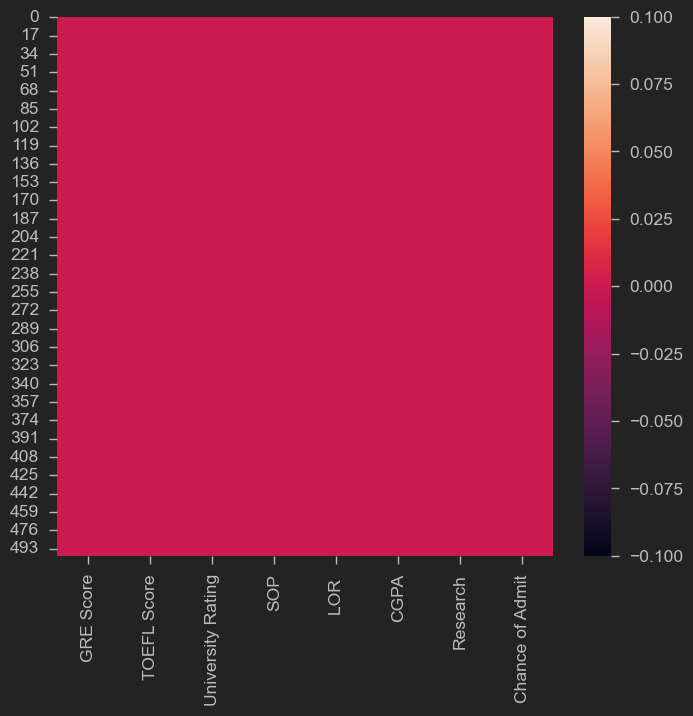

In [8]:
sns.heatmap(df.isnull()) # checking for missing values in the dataframe using a heatmap 

In [9]:
#calculate the mean, standard deviation, minimum, and maximum values of the dataframe
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Perform Data Visualization and Prepare the Data for Model Training 


In [10]:
# Let's visualize the relationship between GRE Score and Chance of Admit

import plotly.express as px

# the third variable "University Rating" is represented by color
# Let's add a fourth variable "SOP" as the size 
fig = px.scatter(df, x = "GRE Score", y = "Chance of Admit", color = "University Rating", size= 'SOP', title = 'GRE Score vs Chance of Admit')
fig.update_traces(marker=dict(sizemode='diameter', sizeref=0.25)) 

df['SOP']=df['SOP']**2 # squaring the SOP values to make the size of the bubbles more visible

fig.show()

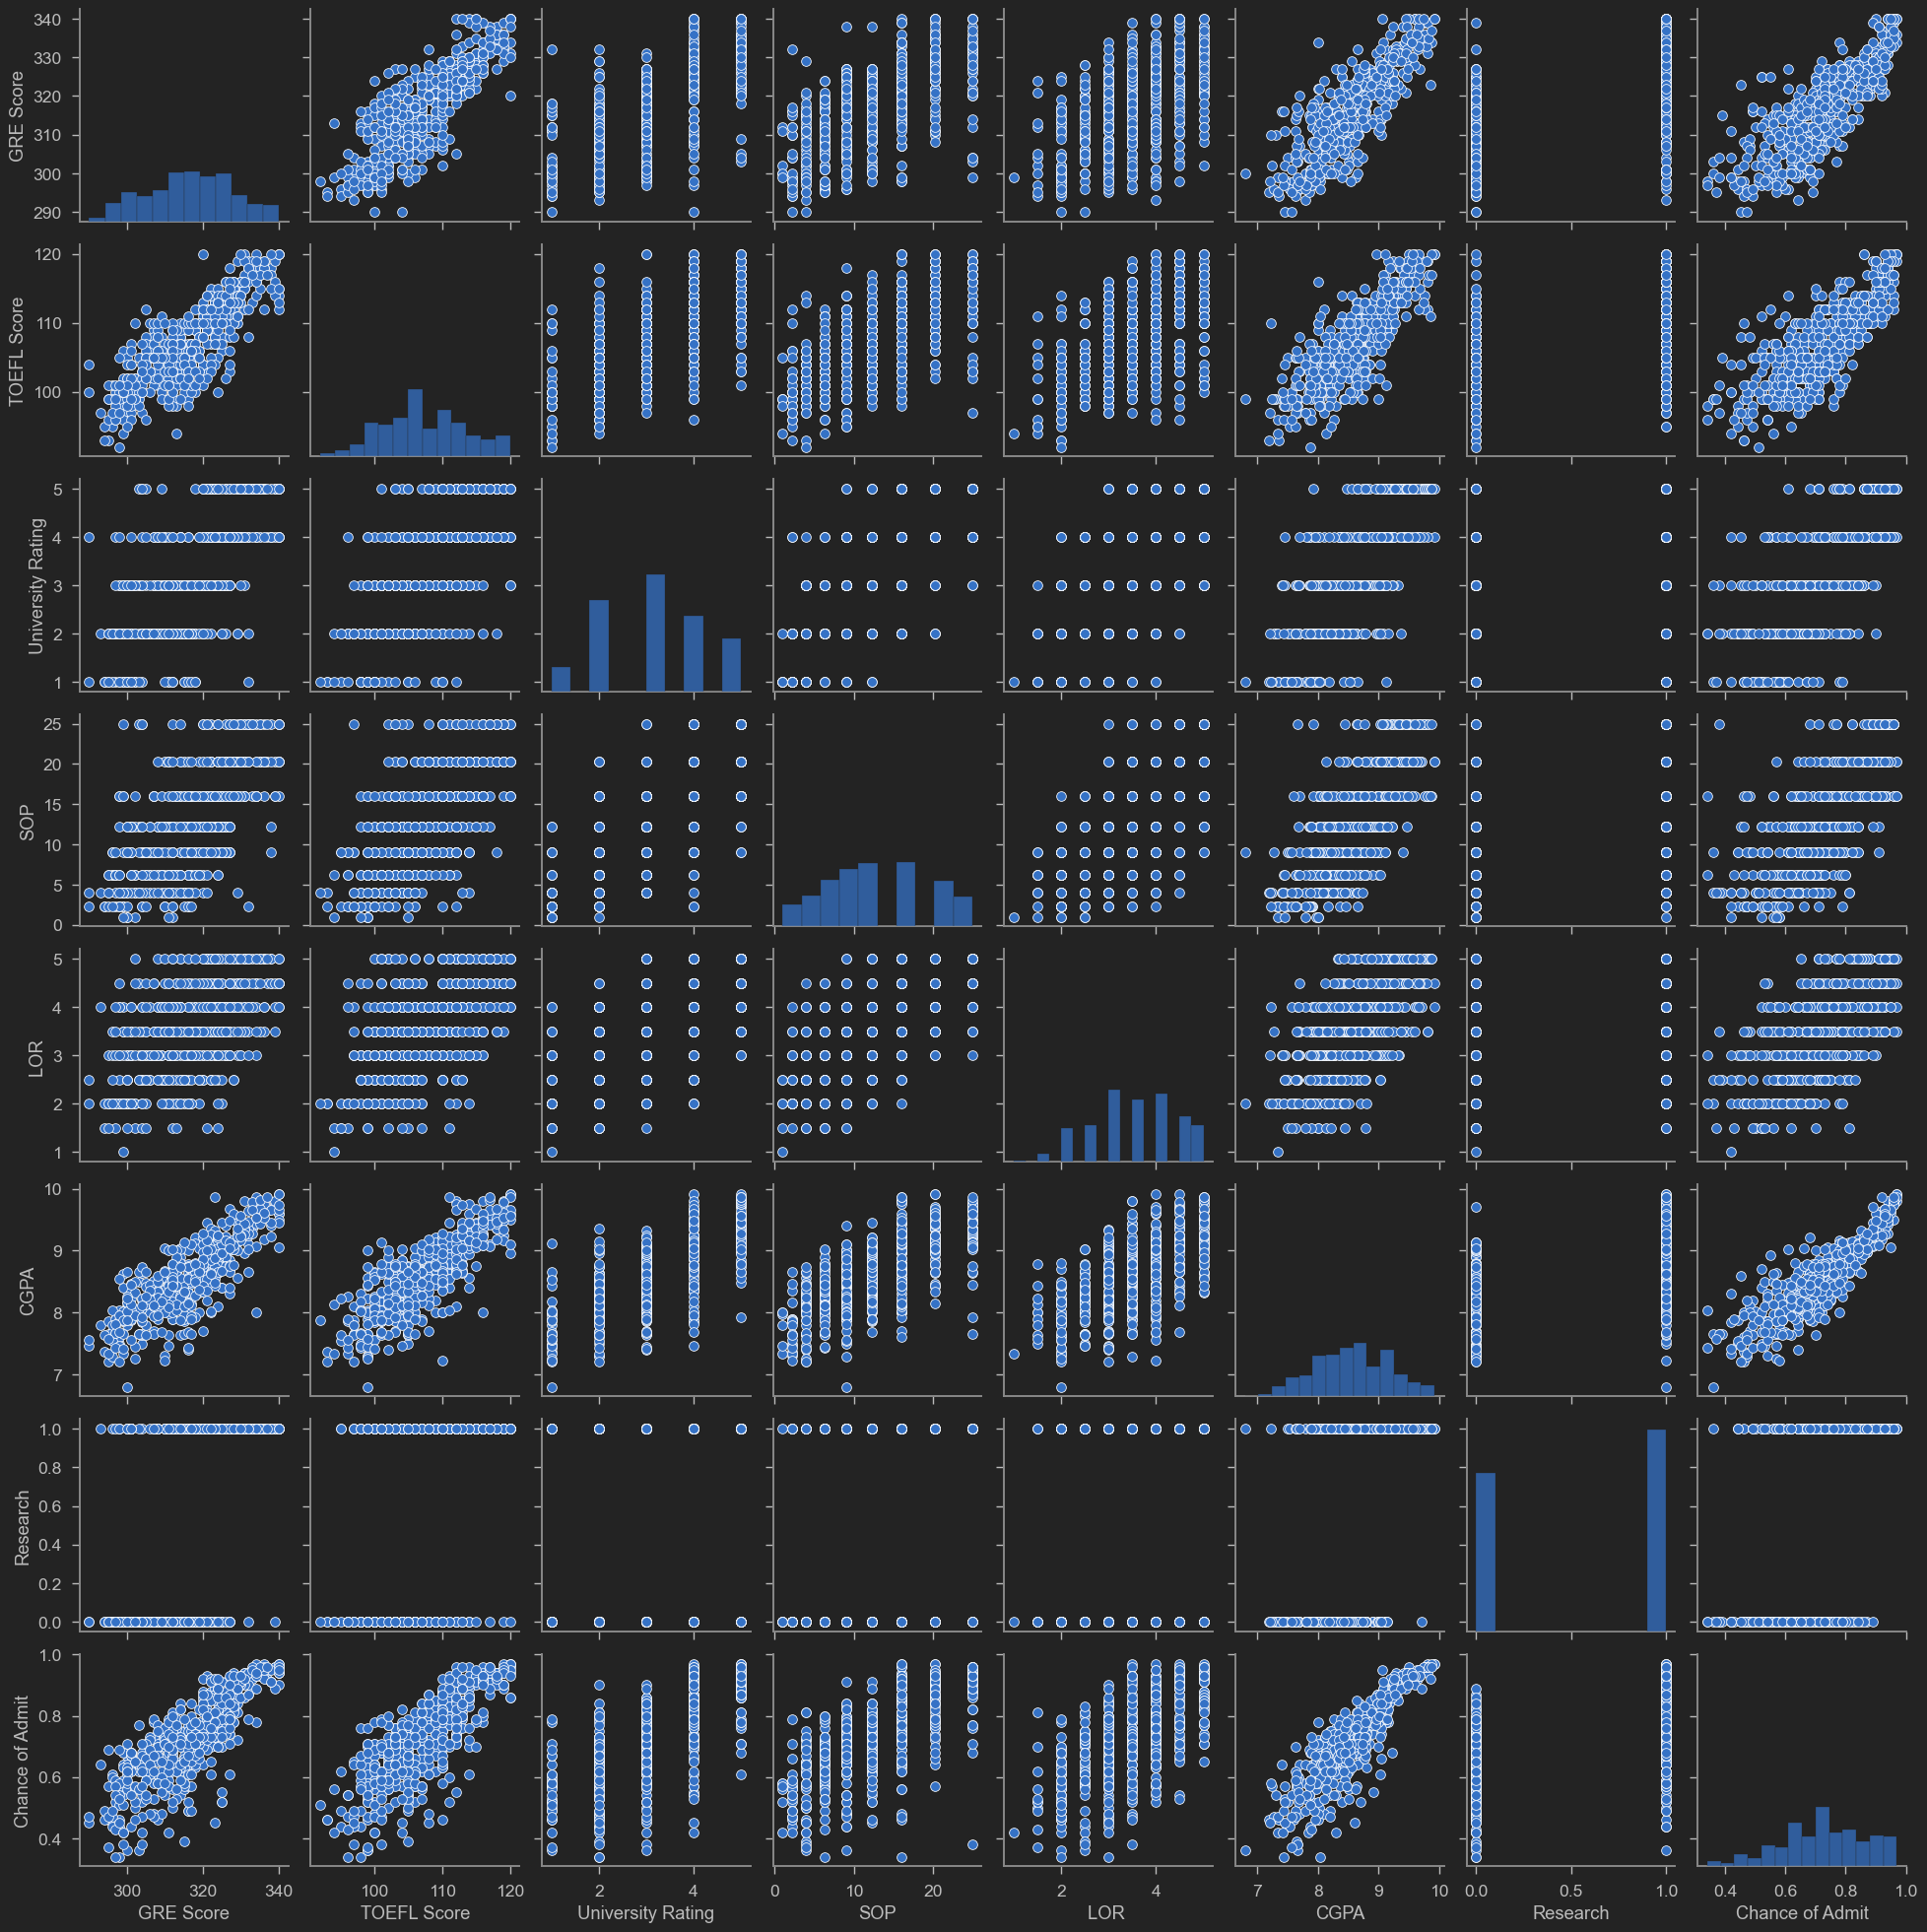

In [11]:
sns.pairplot(df);

Shows a correlation between all the variables. Chance of admit is positively correlated with GRE Score, TOEFL Score, and CGPA. 

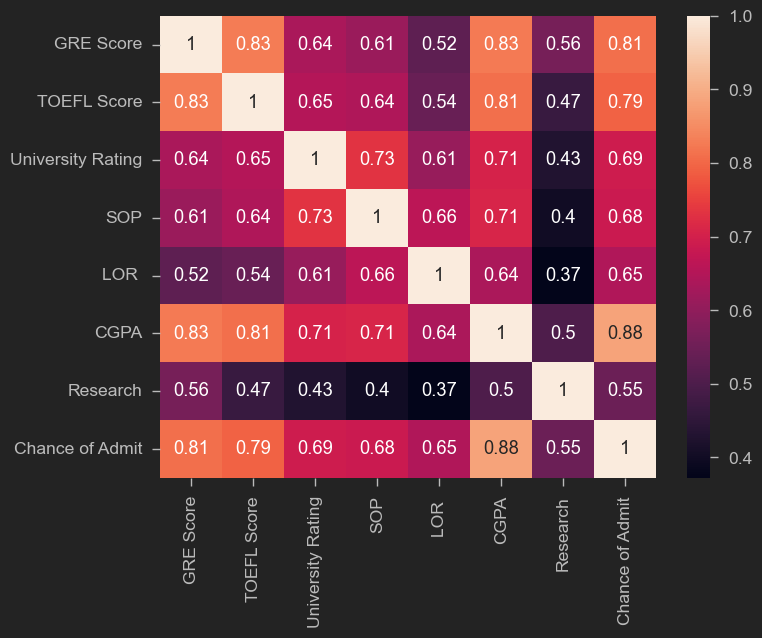

In [12]:
# We can see that chance of admit is positively correlated with GRE Score, TOEFL Score, University Rating, and SOP.

plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True);

In [13]:
y = df['Chance of Admit'] # dependent variable

In [14]:
df = df.drop(['Chance of Admit'], axis = 1) # drop the target variable from the dataframe

In [15]:
X = df # independent variables

In [16]:
X.shape #500 rows and 7 columns/inputs

(500, 7)

In [17]:
y.shape #outputs    

(500,)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:

X_train.shape

(400, 7)

In [21]:
X_test.shape

(100, 7)

##  Traing an XG-Boost Algorithm Without Optimization


In [22]:
!pip install xgboost

In [23]:
# Train an XGBoost regressor model # works well with large datasets and is very fast 
# good for regression and classification problems

import xgboost as xgb 

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 20, n_estimators = 500)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.6640210017601595


In [25]:
# make predictions on the test data
y_predict = model.predict(X_test)


In [26]:
y_test

212    0.95
249    0.77
372    0.95
316    0.54
190    0.90
       ... 
129    0.92
113    0.72
389    0.76
88     0.64
320    0.75
Name: Chance of Admit, Length: 100, dtype: float64

In [27]:
y_predict

array([0.94985354, 0.7403117 , 0.94457626, 0.55408335, 0.88628304,
       0.93975854, 0.6674862 , 0.6572864 , 0.77734864, 0.79106945,
       0.8972366 , 0.78420043, 0.67065734, 0.7111154 , 0.9201833 ,
       0.5336394 , 0.8606181 , 0.7772509 , 0.848961  , 0.63821816,
       0.7859853 , 0.7890438 , 0.66466635, 0.9053924 , 0.8141848 ,
       0.76908135, 0.85900605, 0.93286324, 0.69950414, 0.9398486 ,
       0.92897373, 0.8009151 , 0.52443254, 0.6548223 , 0.75625294,
       0.7999699 , 0.66251826, 0.6837759 , 0.79829586, 0.6686854 ,
       0.9053779 , 0.86792713, 0.54414356, 0.84276474, 0.80154574,
       0.93954057, 0.8062085 , 0.7515136 , 0.64338106, 0.7498259 ,
       0.60902786, 0.51154774, 0.745848  , 0.66956604, 0.830344  ,
       0.89933705, 0.6054201 , 0.6907503 , 0.8262682 , 0.74585515,
       0.7194335 , 0.58735967, 0.91680413, 0.63741964, 0.62600166,
       0.71593714, 0.52803314, 0.4821426 , 0.69748867, 0.66561353,
       0.50198597, 0.55102205, 0.81240356, 0.77133435, 0.72547

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.075 
MSE = 0.0056262068706148805 
MAE = 0.05124775156974792 
R2 = 0.6640210017601595


The coefficient of determination (R2) represents the proportion of the variation in the dependent variable that is predictable from the independent variable.  So we have a 66% accuracy between the test and predicted data

Retrain the model with less 'max_depth' from 20 to 3

In [29]:

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 3, n_estimators = 500)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_predict = model.predict(X_test)

In [31]:
y_test

212    0.95
249    0.77
372    0.95
316    0.54
190    0.90
       ... 
129    0.92
113    0.72
389    0.76
88     0.64
320    0.75
Name: Chance of Admit, Length: 100, dtype: float64

In [32]:
y_predict

array([0.94824797, 0.7746237 , 0.91702145, 0.52694386, 0.8880282 ,
       0.9412324 , 0.63883644, 0.58668876, 0.7943132 , 0.8475107 ,
       0.9202787 , 0.75088286, 0.564735  , 0.6390832 , 0.9233367 ,
       0.6100489 , 0.9128747 , 0.8183464 , 0.8591838 , 0.616066  ,
       0.7917636 , 0.81706417, 0.5982469 , 0.87333137, 0.82821625,
       0.6892879 , 0.89046764, 0.92092055, 0.69824004, 0.9481489 ,
       0.92665017, 0.8097293 , 0.4666621 , 0.6778882 , 0.68315506,
       0.84464586, 0.67105234, 0.708111  , 0.7723259 , 0.58019453,
       0.9501818 , 0.8779673 , 0.4324733 , 0.90466064, 0.8384818 ,
       0.9375366 , 0.87988514, 0.6108966 , 0.7018373 , 0.6394684 ,
       0.5439748 , 0.47835296, 0.7749806 , 0.555658  , 0.8236536 ,
       0.93261534, 0.66237277, 0.6063414 , 0.79831314, 0.6112172 ,
       0.539463  , 0.4252752 , 0.9435724 , 0.64320093, 0.6121576 ,
       0.5983847 , 0.50959915, 0.44202346, 0.64495   , 0.7065527 ,
       0.64456683, 0.66849494, 0.77114344, 0.72848326, 0.61484

In [33]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.077 
MSE = 0.005857774047544541 
MAE = 0.054117762410640716 
R2 = 0.6501925539410071


We can see a small difference in R2 - accuracy of the model, when the max-depth is changed from 20 to 3; suggesting 3 would have been sufficient

##  Perform Hyperparameters Optimisation using Gridsearch 


- GridSearch performs exhaustive search over a specified list of parameters.
- We provide the algorithm with the hyperparameters we would like to experiment with and the values we want to try out. 
- We will have the following number of combinations: 3 * 3 * 3 * 2 = 54.
- We will run each combination 5 times since we set the crossvalidation = 5.
- Total number of runs = 54 * 5 = 270 


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters_grid = { 'max_depth': [3, 6, 10],  
                   'learning_rate': [0.01, 0.05, 0.1], 
                   'n_estimators': [100, 500, 1000],
                   'colsample_bytree': [0.3, 0.7]}

In [36]:
import xgboost as xgb # import the xgboost library

In [37]:
model = xgb.XGBRegressor() # instantiate the model

In [38]:
# Note that we used the "neg_mean_squared_error" since GridSearchCV() ranks all the algorithms (estimators) 
# and specifies which one is the best. We are trying to minimize the error.  
xgb_gridsearch = GridSearchCV(estimator = model, # the model that we want to fit to the data
                              param_grid = parameters_grid,  # the parameters that we want to test
                              scoring = 'neg_mean_squared_error',  # the scoring metric that we want to use
                              cv = 5, # the number of cross-validation we want to use
                              verbose = 5) # the number of cross-validation we want to use

In [39]:
xgb_gridsearch.fit(X_train, y_train) # fit the model to the training dataset

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.007 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.009 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.008 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.008 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.007 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.004 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.004 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.005 total

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=5)

In [40]:
xgb_gridsearch.best_params_ # best parameters

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [41]:
xgb_gridsearch.best_estimator_ # best estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_predict = xgb_gridsearch.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.052 
MSE = 0.0027121889658787046 
MAE = 0.03609583956003188 
R2 = 0.8380367887728437


Here we have 83.8 % accuracy - much better than the XG Boost algorithm without optimisation

## Hyperparameter Optimisation Using Random Search Method


- Grid search works great if the number of combinations are limited. 
- In scenarios when the search space is large, RandomizedSearchCV is preferred.
- The algorithm works by evaluating a select few numbers of random combinations.
- We have the freedom and control over the number of iterations. 

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# Define the grid of hyperparameters to search


grid = {
    'n_estimators': [100, 500, 700],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.5, 1],
    'min_child_weight': [1, 2, 3]  
            }


import xgboost as xgb
model = xgb.XGBRegressor()

# Set up the random search 
random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = grid,
                               cv = 5, 
                               n_iter = 50,
                               scoring = 'neg_mean_absolute_error',
                               verbose = 5, 
                               return_train_score = True)
random_cv.fit(X_train, y_train)

random_cv.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.001, test=-0.060) total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.001, test=-0.054) total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.001, test=-0.073) total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.001, test=-0.064) total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.001, test=-0.069) total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100;, score=(train=-0.036, test=-0.044) total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100;, score=(train=-0.036, test=-0.048) total ti

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
y_predict = random_cv.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.052 
MSE = 0.0027278702158479505 
MAE = 0.03655228313207626 
R2 = 0.837100354905946


Performance of 83.7% is on par with grid-search method

## Hyperparameter Optimisation Using Bayesian Optimisation


- Bayesian optimization overcomes the drawbacks of random search algorithms by exploring search spaces in a more efficient manner. 
- If a region in the search space appears to be promising (i.e.: resulted in a small error), this region should be explored more which increases the chances of achieving better performance! 
- We will need to specify the parameters search space.


In [50]:
# Let's install a library called Scikit-Optimize (Skopt) which is used to perform bayesian optimization 
# BayesSearchCV class is used in a similar fashion to GridSearchCV
# We secify the search space as a distribution instead of discrete values

! pip install scikit-optimize
from skopt import BayesSearchCV
import xgboost as xgb # 


In [51]:
model = xgb.XGBRegressor()

In [52]:

search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "max_depth": (1, 50),
    "n_estimators": (5, 500),
}

In [55]:
#define the search
xgb_bayes_search = BayesSearchCV(model, 
                               search_space, 
                               n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', 
                               cv = 5)

In [57]:
xgb_bayes_search.fit(X_train, y_train) # fit the model to the training dataset
y_predict = xgb_bayes_search.predict(X_test) # make predictions on the test data

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.051 
MSE = 0.002622894003511128 
MAE = 0.03579732285737991 
R2 = 0.843369197035472


## Findings

- XG-Boost Algorithm Without Optimization: 66% accuracy
- Gridsearch Method : 83.8 % accuracy
- Random Search Method: 83.7% accuracy
- Bayesian Optimisation Method: 84.3% accuracy

- Winner: Bayesian Optimisation approach